In [1]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import plotly.express as px

import seaborn as sns


In [2]:
# Read the CSV file and load into a DataFrame
df = pd.read_csv('covid_worldwide.csv')
df

,Serial Number,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,1,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269"
1,2,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776"
2,3,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518"
3,4,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596"
4,5,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593"
...,...,...,...,...,...,...,...,...
226,227,Diamond Princess,712,13,699,0,NaN,NaN
227,228,Vatican City,29,NaN,29,0,NaN,799
228,229,Western Sahara,10,1,9,0,NaN,"626,161"
229,230,MS Zaandam,9,2,7,0,NaN,NaN


In [3]:
# Print the shape of the DataFrame
print(df.shape)

(231, 8)


In [4]:
#Df info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Serial Number    231 non-null    int64 
 1   Country          231 non-null    object
 2   Total Cases      231 non-null    object
 3   Total Deaths     225 non-null    object
 4   Total Recovered  210 non-null    object
 5   Active Cases     212 non-null    object
 6   Total Test       213 non-null    object
 7   Population       228 non-null    object
dtypes: int64(1), object(7)
memory usage: 14.6+ KB


In [5]:
#Delete elements from the dataframe with different data types

# 1. Make a copy of the original DataFrame
df_copy = df.copy()

# Delete elements with non-numeric data types
df_copy = df_copy.select_dtypes(include=['object'])

#Df info.
df_copy.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Country          231 non-null    object
 1   Total Cases      231 non-null    object
 2   Total Deaths     225 non-null    object
 3   Total Recovered  210 non-null    object
 4   Active Cases     212 non-null    object
 5   Total Test       213 non-null    object
 6   Population       228 non-null    object
dtypes: object(7)
memory usage: 12.8+ KB


In [6]:
# 1. Add a new column called 'nulos' where we are going to save the sum of the null values on each row of the dataframe
df_copy ['nulos'] = df_copy.isnull().sum(axis=1)

# 2. calculate the total number of columns in the dataframe
num_cols = df_copy.shape[1]

# 3. Calculate the percentage of the null values
df_copy['Porcentaje_null'] = df_copy['nulos'] / num_cols

# 4. Since the request isn't complete clear, we are assuming that we have to create a new dataframe where the rows correspond with the following condition where we are validating that the null values are less or equal than the 50 percent of the total row data
df_copy[df_copy['Porcentaje_null'] <= 0.5]

df_copy

,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,nulos,Porcentaje_null
0,USA,"104,196,861","1,132,935","101,322,779","1,741,147","1,159,832,679","334,805,269",0,0.000
1,India,"44,682,784","530,740","44,150,289","1,755","915,265,788","1,406,631,776",0,0.000
2,France,"39,524,311","164,233","39,264,546","95,532","271,490,188","65,584,518",0,0.000
3,Germany,"37,779,833","165,711","37,398,100","216,022","122,332,384","83,883,596",0,0.000
4,Brazil,"36,824,580","697,074","35,919,372","208,134","63,776,166","215,353,593",0,0.000
...,...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13,699,0,NaN,NaN,2,0.250
227,Vatican City,29,NaN,29,0,NaN,799,2,0.250
228,Western Sahara,10,1,9,0,NaN,"626,161",1,0.125
229,MS Zaandam,9,2,7,0,NaN,NaN,2,0.250


In [7]:
# check if there are duplicated entries on the country column

df_copy[df_copy.duplicated('Country', False)]


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,nulos,Porcentaje_null


In [8]:
# Read the data with thousands formatting
df_copy_th = pd.read_csv ('covid_worldwide.csv',thousands=',')
df_copy_th = df_copy_th.drop(labels= 'Serial Number', axis= 1)
df_copy_th.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          231 non-null    object 
 1   Total Cases      231 non-null    int64  
 2   Total Deaths     225 non-null    float64
 3   Total Recovered  210 non-null    float64
 4   Active Cases     212 non-null    float64
 5   Total Test       213 non-null    float64
 6   Population       228 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 12.8+ KB


In [9]:
df_copy_th


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population
0,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08
1,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09
2,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07
3,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07
4,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08
...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN
227,Vatican City,29,NaN,29.0,0.0,NaN,7.990000e+02
228,Western Sahara,10,1.0,9.0,0.0,NaN,6.261610e+05
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN


In [10]:
# Calculate the percentage of deaths by country
df_copy_th['P_deaths_by_country'] = (
    (df_copy_th['Total Deaths']/df_copy_th['Total Cases']))*100

# Round the percentage to twice units
df_copy_th['P_deaths_by_country'] = df_copy_th['P_deaths_by_country'].round(2)

df_copy_th


,Country,Total Cases,Total Deaths,Total Recovered,Active Cases,Total Test,Population,P_deaths_by_country
0,USA,104196861,1132935.0,101322779.0,1741147.0,1.159833e+09,3.348053e+08,1.09
1,India,44682784,530740.0,44150289.0,1755.0,9.152658e+08,1.406632e+09,1.19
2,France,39524311,164233.0,39264546.0,95532.0,2.714902e+08,6.558452e+07,0.42
3,Germany,37779833,165711.0,37398100.0,216022.0,1.223324e+08,8.388360e+07,0.44
4,Brazil,36824580,697074.0,35919372.0,208134.0,6.377617e+07,2.153536e+08,1.89
...,...,...,...,...,...,...,...,...
226,Diamond Princess,712,13.0,699.0,0.0,NaN,NaN,1.83
227,Vatican City,29,NaN,29.0,0.0,NaN,7.990000e+02,NaN
228,Western Sahara,10,1.0,9.0,0.0,NaN,6.261610e+05,10.00
229,MS Zaandam,9,2.0,7.0,0.0,NaN,NaN,22.22


In [11]:
# Top 10 countries with the highest number of deaths
df_Hg_deaths= df_copy_th.nlargest(10, 'Total Deaths')[['Country', 'Total Deaths']]
df_Hg_deaths

,Country,Total Deaths
0,USA,1132935.0
4,Brazil,697074.0
1,India,530740.0
9,Russia,395108.0
18,Mexico,332198.0
34,Peru,218931.0
8,UK,204171.0
7,Italy,186833.0
3,Germany,165711.0
2,France,164233.0


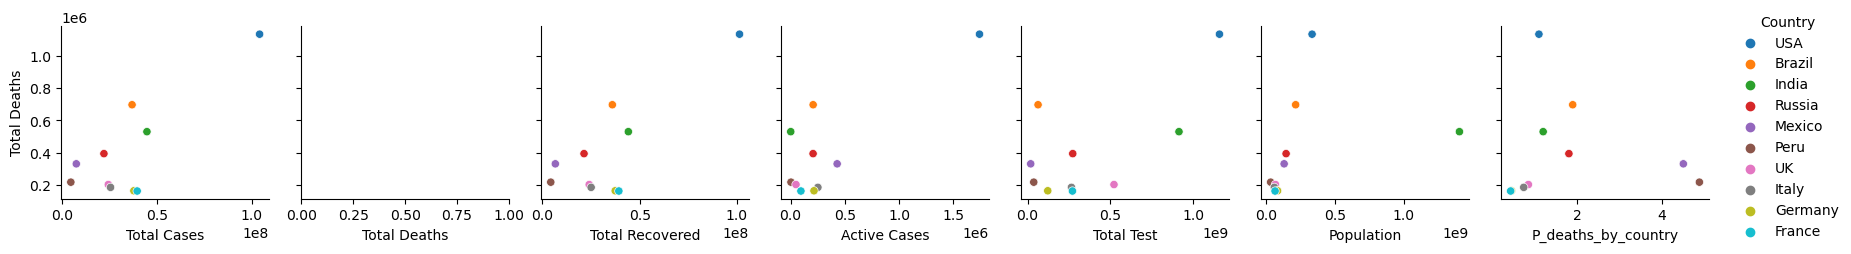

In [17]:
#Graphic
tmp = df_copy_th.nlargest(10, 'Total Deaths')
grap = sns.pairplot(tmp, hue='Country', y_vars='Total Deaths')
plt.show(grap)

In [13]:
# Top 10 countries with fewer deaths
df_copy_th.nsmallest(10, 'Total Deaths')[['Country', 'Total Deaths']]


,Country,Total Deaths
216,Nauru,1.0
228,Western Sahara,1.0
209,Cook Islands,2.0
219,Saint Pierre Miquelon,2.0
229,MS Zaandam,2.0
214,St. Barth,6.0
220,Wallis and Futuna,7.0
224,Montserrat,8.0
213,Palau,9.0
217,Anguilla,12.0


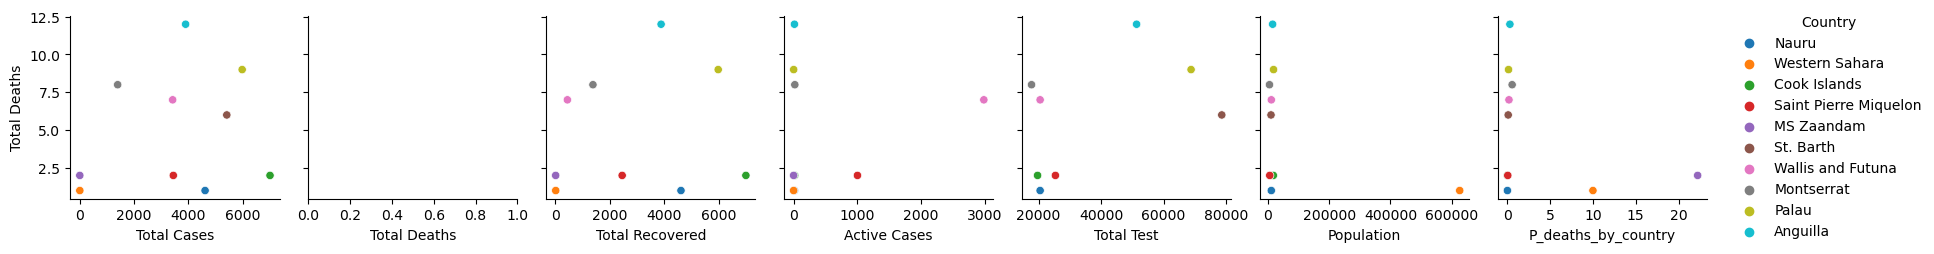

In [18]:
#Graphic
tmp_2= df_copy_th.nsmallest(10, 'Total Deaths')
grap_2 = sns.pairplot(tmp_2, hue='Country', y_vars='Total Deaths')
plt.show(grap_2)

In [21]:
# Calculate top 10 countries with more recovered patients
df_rec_p= df_copy_th.nlargest(10, 'Total Recovered')[['Country', 'Total Recovered']]
#df_rec_p['Total Recovered'] = df_rec_p['Total Recovered'].map(format_numbers)
df_rec_p


,Country,Total Recovered
0,USA,101322779.0
1,India,44150289.0
2,France,39264546.0
3,Germany,37398100.0
4,Brazil,35919372.0
6,S. Korea,29740877.0
7,Italy,25014986.0
8,UK,24020088.0
5,Japan,21567425.0
9,Russia,21356008.0


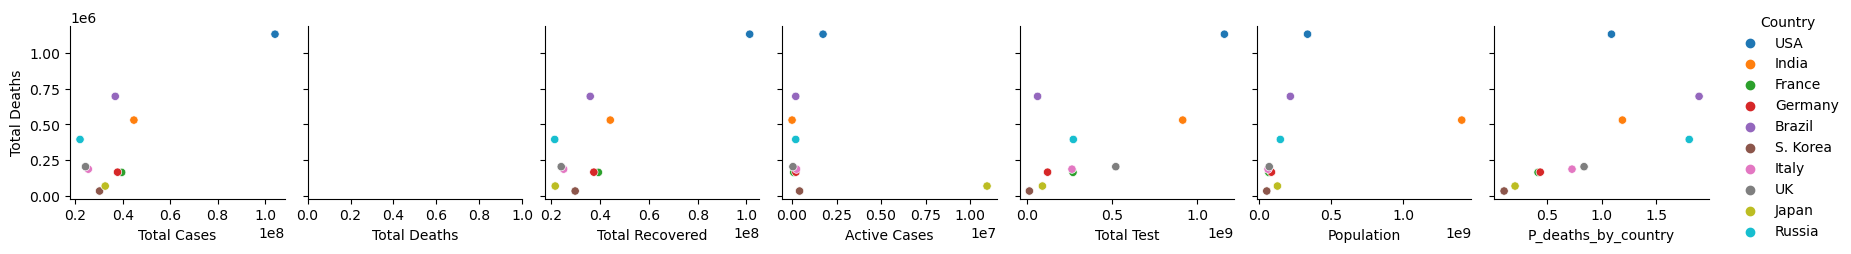

In [23]:
#Graphic
tmp_3 = df_copy_th.nlargest(10, 'Total Recovered')
grap_3 = sns.pairplot(tmp_3, hue='Country', y_vars='Total Deaths')
plt.show(grap_3)

In [24]:
tmp_covid = df_copy_th.dropna(subset='Total Cases')
tmp_covid['Total Cases'] = tmp_covid['Total Cases'].astype(int)

px.scatter_geo(tmp_covid, locations='Country',
               locationmode='country names', size='Total Cases', color='Country')
